In [17]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
sns.set_context('paper')
plt.style.use("default")
pd.set_option('display.max_columns', None)

In [2]:
with open("../Data/simu6a_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 500]
# df_test = df_test.loc[df_test.session < 500]

In [3]:
df_study

,index,study_itemno1,study_itemno2,study_item1,study_item2,session
0,0,716,141,HOOP,BLUEJAY,0
1,1,1261,862,SEAGULL,MAN,0
2,2,1067,1402,PIKE,SUIT,0
3,3,146,707,BOLT,HIGHWAY,0
4,4,155,1140,BOULDER,PUDDLE,0
...,...,...,...,...,...,...
71995,35995,397,606,CRAB,FRIEND,11999
71996,35996,829,582,LIPSTICK,FLORIDA,11999
71997,35997,1268,394,SENATOR,COWARD,11999
71998,35998,1113,965,POSTAGE,NUT,11999


In [4]:
df_test

,index,test_itemno,test_item,correct_ans,lag,session,order
0,0,716,HOOP,141,5,0,1
1,1,736,INDIAN,1342,5,1,1
2,2,1217,RUM,318,1,2,1
3,3,1119,PREACHER,754,1,3,1
4,4,13,AIRPORT,327,0,4,1
...,...,...,...,...,...,...,...
11995,5995,265,CEILING,767,5,11995,2
11996,5996,602,FRECKLE,542,0,11996,2
11997,5997,732,ICING,1193,2,11997,2
11998,5998,1569,VINEGAR,976,0,11998,2


### Run CMR-IA

In [5]:
s_mat = np.load('../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [6]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_rec = 0.45,
    beta_cue = 0.45,
    beta_rec_new = 0.45,
    beta_rec_post = 0.5,
    gamma_fc = 0.7,
    gamma_cf = 0.5,
    s_fc = 0.1,
    s_cf = 0.1,
    c_thresh = 0.01,
    c_thresh_ass = 0.01,
    a = 2800,
    b = 2.14,
    m = 0,
    n = 1,
    kappa = 0.08,
    lamb = 0.05,
    eta = 0.02,
    phi_s = 1,
    phi_d = 0.6,
    nitems_in_accumulator = 10,
    d_ass = 0.8
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.45,
 'beta_rec_new': 0.45,
 'beta_rec_post': 0.5,
 'beta_distract': None,
 'phi_s': 1,
 'phi_d': 0.6,
 's_cf': 0.1,
 's_fc': 0.1,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.01,
 'c_thresh_ass': 0.01,
 'd_ass': 0.8,
 'lamb': 0.05,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 10,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 2.14,
 'm': 0,
 'n': 1,
 'c1': 0,
 'gamma_fc': 0.7,
 'gamma_cf': 0.5}

In [7]:
df_simu, f_in = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 134.44875168800354


,session,test_itemno,s_resp,s_rt,csim
0,0,716,1599.0,2370.0,0.733075
1,1,736,1342.0,2140.0,0.553180
2,2,1217,894.0,1210.0,0.810457
3,3,1119,1095.0,1660.0,0.811235
4,4,13,327.0,1920.0,0.887423
...,...,...,...,...,...
11995,11995,265,259.0,2700.0,0.726135
11996,11996,602,1245.0,2110.0,0.708577
11997,11997,732,755.0,2230.0,0.788641
11998,11998,1569,976.0,1550.0,0.891152


In [8]:
df_simu = df_simu.merge(df_test,on=['session','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,session,test_itemno,s_resp,s_rt,csim,index,test_item,correct_ans,lag,order,correct
0,0,716,1599.0,2370.0,0.733075,0,HOOP,141,5,1,False
1,1,736,1342.0,2140.0,0.553180,1,INDIAN,1342,5,1,True
2,2,1217,894.0,1210.0,0.810457,2,RUM,318,1,1,False
3,3,1119,1095.0,1660.0,0.811235,3,PREACHER,754,1,1,False
4,4,13,327.0,1920.0,0.887423,4,AIRPORT,327,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,265,259.0,2700.0,0.726135,5995,CEILING,767,5,2,False
11996,11996,602,1245.0,2110.0,0.708577,5996,FRECKLE,542,0,2,False
11997,11997,732,755.0,2230.0,0.788641,5997,ICING,1193,2,2,False
11998,11998,1569,976.0,1550.0,0.891152,5998,VINEGAR,976,0,2,True


In [9]:
# f_in

In [11]:
# sessions = df_simu.session.to_numpy()
# for sess in sessions:
#     df_tmp = df_study.loc[df_study.session == sess]
#     tmp1 = df_tmp.study_itemno1.to_numpy()
#     tmp2 = df_tmp.study_itemno2.to_numpy()
#     tmp = np.concatenate((tmp1, tmp2))
#     tmp = np.sort(tmp)
#     testid = np.searchsorted(tmp, df_simu.test_itemno[sess].item())
#     corrid = np.searchsorted(tmp, df_simu.correct_ans[sess].item())
#     df_simu.loc[df_simu.session == sess, 'corr_fin']= f_in[sess][corrid]
#     df_simu.loc[df_simu.session == sess, 'omean_fin'] = np.mean(np.delete(f_in[sess], [testid,corrid]))
#     df_simu.loc[df_simu.session == sess, 'omax_fin'] = np.delete(f_in[sess], [testid,corrid]).max()
# df_simu

In [12]:
# df_fin = df_simu.groupby('lag')['corr_fin','omean_fin','omax_fin'].mean().reset_index()
# df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
# df_fin

In [13]:
# sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

In [14]:
# sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

### PLOT

In [15]:
df_laggp = df_simu.groupby(['lag','order']).correct.mean().to_frame(name='corr_rate').reset_index()
df_laggp

,lag,order,corr_rate
0,0,1,0.808151
1,0,2,0.809145
2,1,1,0.562072
3,1,2,0.528837
4,2,1,0.352000
5,2,2,0.374000
6,3,1,0.238648
7,3,2,0.246040
8,4,1,0.191133
9,4,2,0.191133


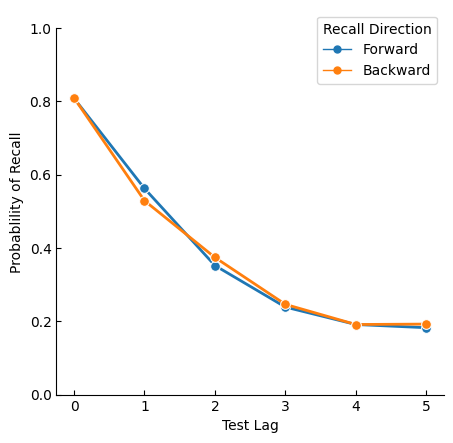

In [29]:
from matplotlib.lines import Line2D

fig,ax = plt.subplots(figsize=(5,5))
ax.spines['left'].set_bounds(0, 1)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp, x='lag', y='corr_rate', linewidth=2, marker='o', markersize = 7, hue='order',palette='tab10')
plt.ylim([0,1.05])
plt.xlabel('Test Lag')
plt.ylabel('Probablility of Recall')
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=1, marker='o',
                          markersize = 5, linestyle='-',label = 'Forward'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=1, marker='o',
                          markersize = 5, linestyle='-', label = 'Backward')]
L = plt.legend(handles = legend_elements, title='Recall Direction',loc='upper right')
# L.get_texts()[0].set_text('Forward')
# L.get_texts()[1].set_text('Backward')
plt.savefig('fig/simu6a_recall.pdf')
plt.show()